<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

## School of Computing and Engineering, University of West London
## Massoud Zolgharni

<img src='https://drive.google.com/uc?id=1agMvtONhXT-5iHnaYTzaJDSu71qnhwfB' />

## Intelligent Sensing and Vision
[intsav.github.io](https://intsav.github.io)    |    [github.com/intsav](https://github.com/intsav)   |   [@IntSaV_](https://twitter.com/IntSaV_)



# Tutorial: Fully Connected Networks (FCN) and Convolutional Neural Network (CNN)

To help you understand the fundamentals of deep learning, this tutorial will walk through the basic steps of building two models for classifying handwritten numbers with accuracies surpassing 95%. The first model will be a basic fully-connected neural network, and the second model will be a deeper network that introduces the concepts of convolution and pooling.

## MNIST Dataset Overview

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database

The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalised and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

More info: https://en.wikipedia.org/wiki/MNIST_database

<img src='https://drive.google.com/uc?id=10rl42VOJkOS5iuXgarZJJFxUeJxujOv6' />

You may also see alternative datasets in which the images are inversed, where the background is balck (pixel value of 0) and the digits are bright (for example white with pixel value of 255), as shown below.

<img src='https://drive.google.com/uc?id=1R-6ybEncYQInIDBIWIFCUnEqE1oyfRH8' />

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

We will use the [**Keras**](https://www.tensorflow.org/guide/keras/overview) Python API with **TensorFlow** as the backend.

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import to_categorical                         # NumPy related tools

## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyse some of its features in Python.

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Notebook.

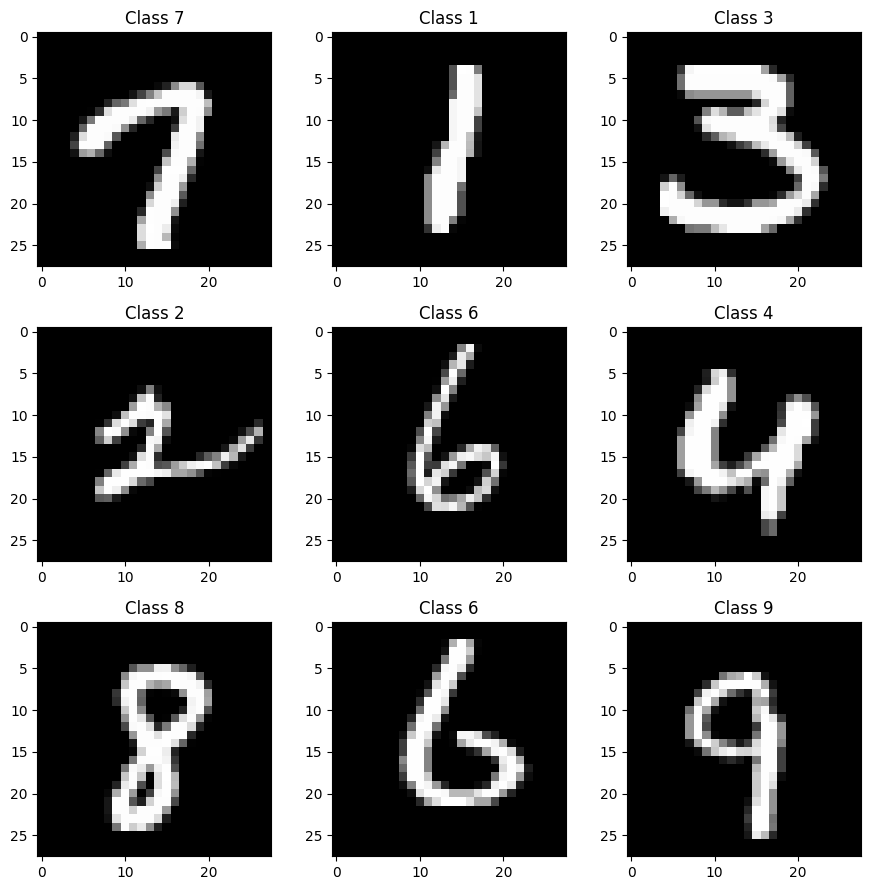

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing the last digit.

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(X_train[num])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0  117  168  181  255  205   18    0    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0   44  201  253  254  254  254  254  174   19    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0   64  242  254  215  108   52   20  197  254   60    0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

<img src='https://drive.google.com/uc?id=16uN5ynmI4Egq0GsBS1FfNgh-Ny5NBI7O' />

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.



```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test  = to_categorical(y_test, nb_classes)

print("Training matrix shape", Y_train.shape)
print("Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 10)
Testing matrix shape (10000, 10)


# Building a 3-layer fully connected network (FCN)

<img src='https://drive.google.com/uc?id=1nM-qj0xQ85GtbMCiporUrAtTeN4SiPYp' />

The Sequential model is a linear stack of layers and is very common.

In [ ]:
model = Sequential()

## The first hidden layer

The first hidden layer is a set of 512 nodes (artificial neurons).


Each node will receive an element from each input vector and apply some weight and bias to it.

In [ ]:
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

An **activation** is a non-linear function applied to the output of the layer above.


It checks the new value of the node, and decides whether that artifical neuron has fired.

The **Rectified Linear Unit (ReLU)** converts all negative inputs to nodes in the next layer to be zero.

Those inputs are then not considered to be fired.


Positive values of a node are unchanged.

In [ ]:
model.add(Activation('relu'))

<img src='https://drive.google.com/uc?id=1Pq15RrqJZ9qFU1BAENgeoC9gawf61vs0' />

**Dropout** zeroes a selection of random outputs (i.e., disables their activation)


Dropout helps protect the model from memorizing or "overfitting" the training data.

In [ ]:
model.add(Dropout(0.2))

## Adding the second hidden layer

The second hidden layer appears identical to our first layer.


However, instead of each of the 512-node receiving 784-inputs from the input image data, they receive 512 inputs from the output of the first 512-node layer.

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## The Final Output Layer

The final layer of 10 neurons in fully-connected to the previous 512-node layer.


The final layer of a FCN should be equal to the number of desired classes (10 in this case).

In [ ]:
model.add(Dense(10))

The **softmax** activation represents a probability distribution over K different possible outcomes.


Its values are all non-negative and sum to 1.

In [ ]:
model.add(Activation('softmax'))

Summarize the built model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

## Compiling the model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimiser helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

<img src='https://drive.google.com/uc?id=1ckOtMYU1ZkFvy1vlSqvlmCnJKTWYNPoU' />

<img src='https://drive.google.com/uc?id=1fr1kKpYZy-jgriWFmpdNQxurBX03KaYB' />

So are smaller learning rates better? Not quite! It's important for an optimiser not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

<img src='https://drive.google.com/uc?id=1c8EW55M03miPh0bvn-LFe13WZpVI8NWs' />

Let's use the Adam optimiser for learning

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimiser to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimiser may never find the global minimum.

So a good batch size may take some trial and error to find!

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2464 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1014 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0725 - accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0563 - accuracy: 0.9818
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0464 - accuracy: 0.9850


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Evaluate Model's Accuracy on Test Data

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9815
Test score: 0.06355369836091995
Test accuracy: 0.9815000295639038


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict(X_test)

predicted_classes = np.argmax(predicted_classes, axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 1ms/step


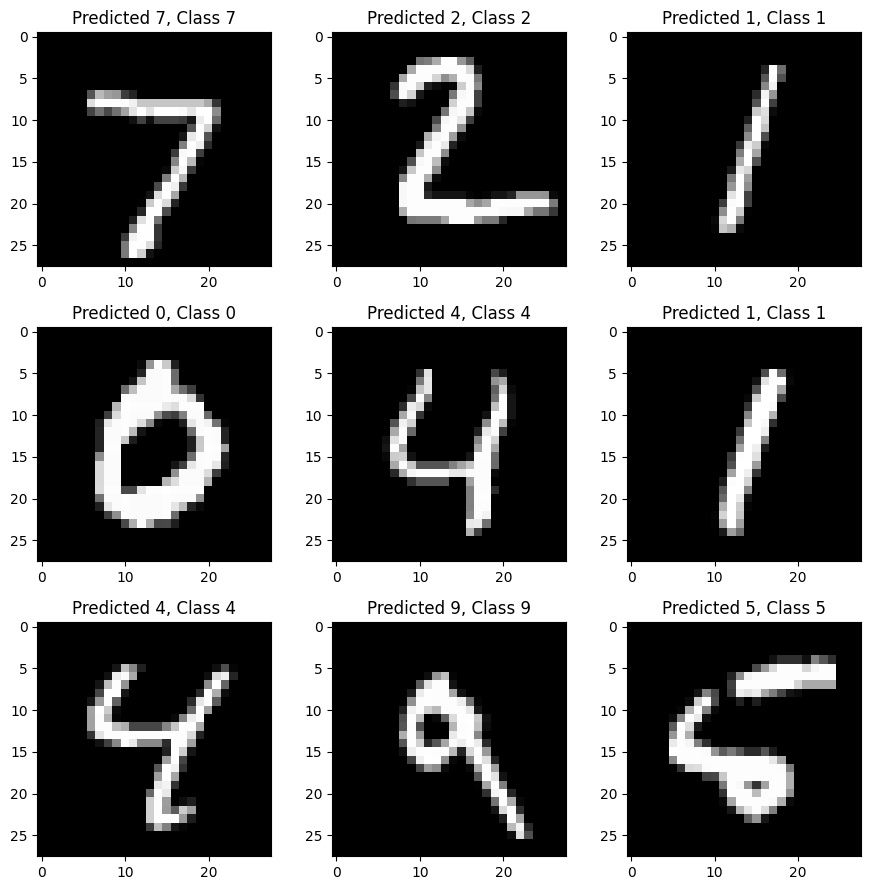

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

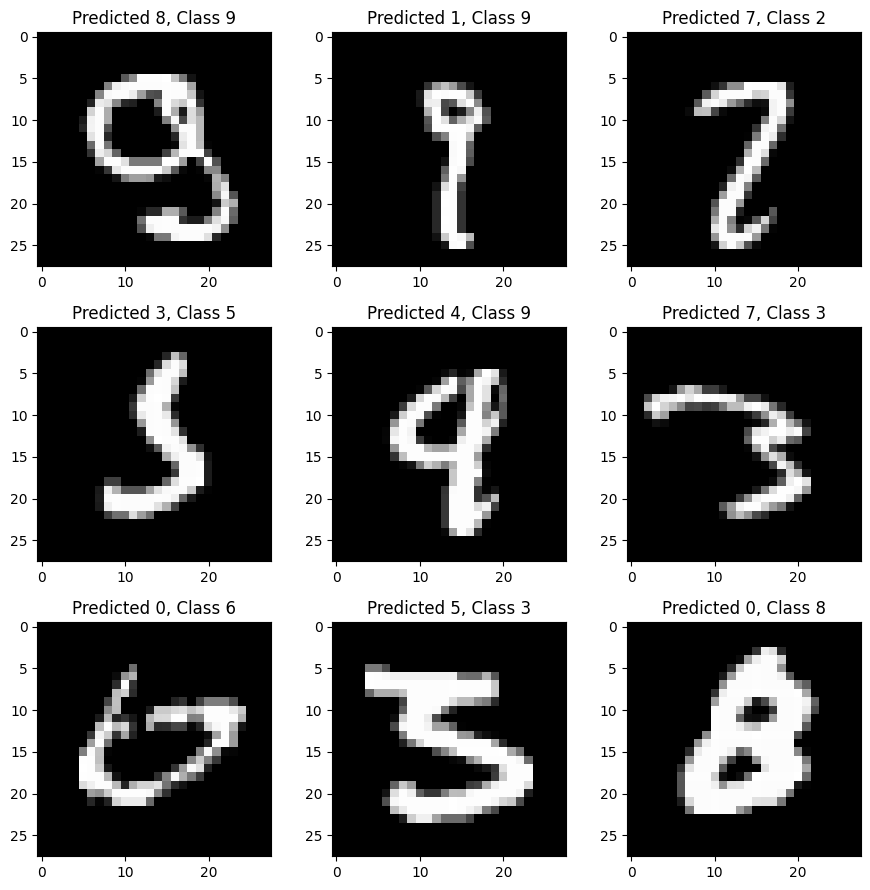

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

# Trying experimenting with the batch size!

#### How does increasing the batch size to 10,000 affect the training time and test accuracy?

#### How about a batch size of 32?

# Introducing Convolution! What is it?

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

<img src='https://drive.google.com/uc?id=1HhqLcGtJz_LVIuyu499trjW2-NyDUApi' />

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.

Kernels are often used in photoediting software to apply blurring, edge detection, sharpening, etc.

<img src='https://drive.google.com/uc?id=1khdoGyMX41EGZKqjMxsVZGk6mdZFTVu-' />

Filters (Kernels) in deep learning networks are used in similar ways, i.e. highlighting some feature.

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognising patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables. This in turn makes the Convolutional Networks faster to train.

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

This figure shows roughly how the data flows in the Convolutional Neural Network that is implemented below.

<img src='https://drive.google.com/uc?id=1gInXCdkHMS4T9YWJZRSJASI3UQrKzxCV' />

The input image is processed in the first convolutional layer using the filter-weights. This results in 16 new images, one for each filter in the convolutional layer. The images are also down-sampled so the image resolution is decreased from 28x28 to 14x14.

These 16 smaller images are then processed in the second convolutional layer. We need filter-weights for each of these 16 channels, and we need filter-weights for each output channel of this layer. There are 36 output channels so there are a total of 16 x 36 = 576 filters in the second convolutional layer. The resulting images are down-sampled again to 7x7 pixels.

The output of the second convolutional layer is 36 images of 7x7 pixels each. These are then flattened to a single vector of length 7 x 7 x 36 = 1764, which is used as the input to a fully-connected layer with 128 neurons (or elements). This feeds into another fully-connected layer with 10 neurons, one for each of the classes, which is used to determine the class of the image, that is, which number is depicted in the image.

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively thousands of times until the classification error is sufficiently low.

These particular filter-weights and intermediate images are the results of one optimization run and may look different if you re-run this Notebook.

## Convolutional Layer

Figure below shows the basic idea of processing an image in the first convolutional layer. The input image depicts the number 7 and four copies of the image are shown here, so we can see more clearly how the filter is being moved to different positions of the image. For each position of the filter, the dot-product is being calculated between the filter and the image pixels under the filter, which results in a single pixel in the output image. So moving the filter across the entire input image results in a new image being generated.

The red filter-weights means that the filter has a positive reaction to black pixels in the input image, while blue pixels means the filter has a negative reaction to black pixels.

In this case it appears that the filter recognises the horizontal line of the 7-digit, as can be seen from its stronger reaction to that line in the output image.

<img src='https://drive.google.com/uc?id=1Y61Gcmf_KR8PlMNtnVAMQ3b27s9HJ0dU' />

The step-size for moving the filter across the input is called the **stride**. There is a stride for moving the filter horizontally (x-axis) and another stride for moving vertically (y-axis).

In the source-code below, the stride is set to 1 in both directions, which means the filter starts in the upper left corner of the input image and is being moved 1 pixel to the right in each step. When the filter reaches the end of the image to the right, then the filter is moved back to the left side and 1 pixel down the image. This continues until the filter has reached the lower right corner of the input image and the entire output image has been generated.

When the filter reaches the end of the right-side as well as the bottom of the input image, then it can be padded with zeroes (white pixels). This causes the output image to be of the exact same dimension as the input image.

Note that the second convolutional layer is more complicated because it takes 16 input channels. We want a separate filter for each input channel, so we need 16 filters instead of just one. Furthermore, we want 36 output channels from the second convolutional layer, so in total we need 16 x 36 = 576 filters for the second convolutional layer. It can be a bit challenging to understand how this works.

Furthermore, the output of the convolution may be passed through the **Rectified Linear Unit (ReLU)**, which merely ensures that the output is positive because negative values are set to zero.

The output may also be down-sampled by so-called **max-pooling**, where the non-highlighted elements are discarded from each feature map.

which considers small windows of 2x2 pixels and only keeps the largest of those pixels. This halves the resolution of the input image e.g. from 28x28 to 14x14 pixels.

<img src='https://drive.google.com/uc?id=1TSkQLzn7EUC7IP_pTQV3dlDSXNryU8pH' />


## Building a "Deep" Convolutional Neural Network

In [ ]:
# import some additional tools
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
# one-hot format classes
nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test  = to_categorical(y_test, nb_classes)

print("Training matrix shape", Y_train.shape)
print("Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 10)
Testing matrix shape (10000, 10)


In [ ]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)       

In [ ]:
# we'll use the same optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [ ]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [ ]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
                    validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


<ipython-input-66-bdc01cb9b2a0>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,


468/468 [==============================] - 33s 57ms/step - loss: 0.1376 - accuracy: 0.9582 - val_loss: 0.0498 - val_accuracy: 0.9842
Epoch 2/5
468/468 [==============================] - 20s 43ms/step - loss: 0.0524 - accuracy: 0.9838 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 3/5
468/468 [==============================] - 19s 41ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0385 - val_accuracy: 0.9864
Epoch 4/5
468/468 [==============================] - 19s 40ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0279 - val_accuracy: 0.9914
Epoch 5/5
468/468 [==============================] - 20s 43ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0201 - val_accuracy: 0.9939


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0200 - accuracy: 0.9939
Test score: 0.02004983089864254
Test accuracy: 0.9939000010490417


Our simple CNN has achieved a good test accuracy. Not bad for a few lines of code!